In [1]:
%matplotlib inline  
from __init__ import *
import core.steps as steps
from core import data_store as ds
from core.common.ds_utils import print_ds_items_info
from core.evaluation.retrieval_perfomance import extract_perfomances_from_arr
from core.common.path_helper import DataStoreHelper
import math, os
%load_ext autoreload
%autoreload 2

In [2]:
ds_helper=DataStoreHelper(r'C:\data\computation\brodatz')

# Plot search perfomance wtih respect to pq params

In [3]:
def plot_pq_search_params_perfomance(search_type, descriptor_name, pq_params_arr, perfomance_type, n_nearest_cutoffs, save_to_file=False):
    subplotname__label__x__y = {}
    label__kwargs={}
    for n_nearest in n_nearest_cutoffs:
        label__x__y=subplotname__label__x__y.setdefault(n_nearest,{})
        for pq_params in pq_params_arr:
            perfomances_ds = ds_helper.pq_search_perfomances_ds(search_type, descriptor_name, pq_params)
            perfomance_arr = ds_helper.perfomance_arr(perfomances_ds)
            y = extract_perfomances_from_arr(perfomance_arr, perfomance_type)[n_nearest-1]
            label = pq_params['n_quantizers']
            x__y = label__x__y.setdefault(label, {})
            x = pq_params['n_clusters']
            x__y[x] = y
            label__kwargs[label]={'linestyle':'dashed'}

        original_ex_search_perfomances_ds=ds_helper.ex_search_perfomances_ds(descriptor_name)
        original_ex_search_perfomance_arr=ds_helper.perfomance_arr(original_ex_search_perfomances_ds)
        y=extract_perfomances_from_arr(original_ex_search_perfomance_arr, perfomance_type)[n_nearest-1]
        label__x__y[0]={pq_params['n_clusters']:y for pq_params in pq_params_arr}
        label__kwargs[0]={'linewidth':3.0}
    
    if save_to_file:
        plot_path=ds_helper.pq_search_perfomances_plot_path(search_type, descriptor_name, perfomance_type)
    else:
        plot_path=None
    label_callback=lambda label: 'original' if label==0 else 'm = {}'.format(label)
    steps.plotting_step3(subplotname__label__x__y, 'n_nearest: ', label_callback, 'k', perfomance_type, save_to_file=plot_path, label__kwargs=label__kwargs)

In [4]:
K_arr = [2 ** i for i in [4,5,6,7,8]]
m_arr = [m for m in [1, 2, 4, 8, 16]]
pq_params_arr = [{'n_clusters': K, 'n_quantizers': m} for K in K_arr for m in m_arr]

bytes_free=1 << 34
imi_pq_params_arr = [{'n_clusters': K, 'n_quantizers': m} for K in K_arr for m in m_arr if 4 * K ** m < bytes_free]
imi_pq_params_arr.remove({'n_clusters': 128, 'n_quantizers': 4})

In [5]:
n_nearest=25
n_nearest_cutoffs=[1,5,10,25]

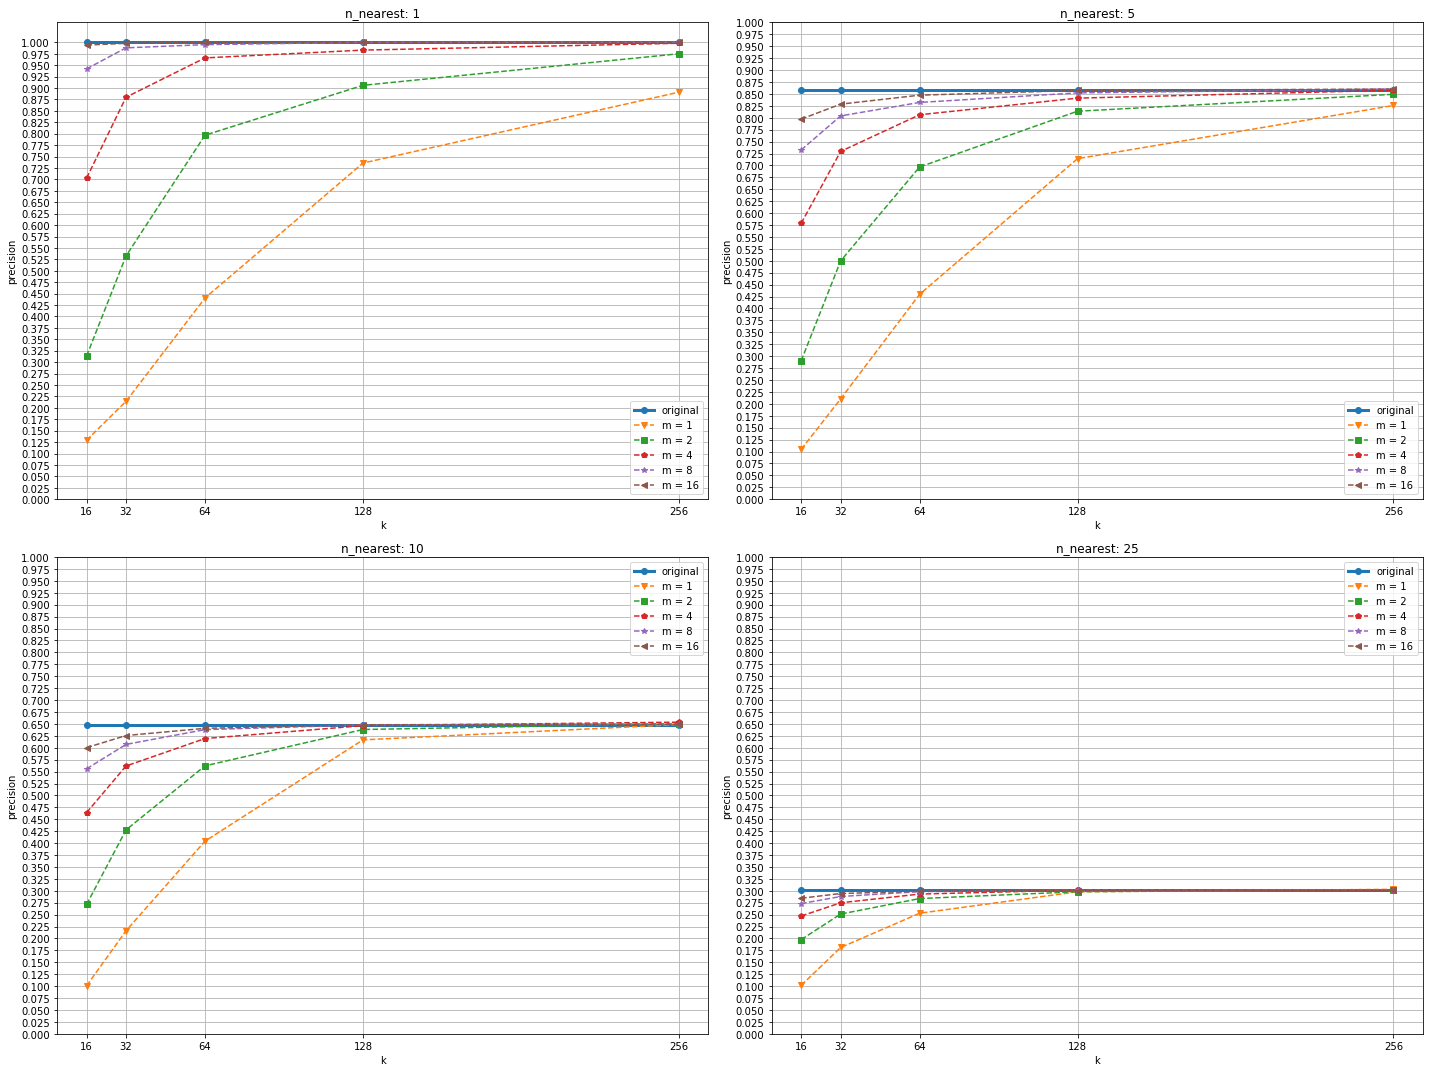

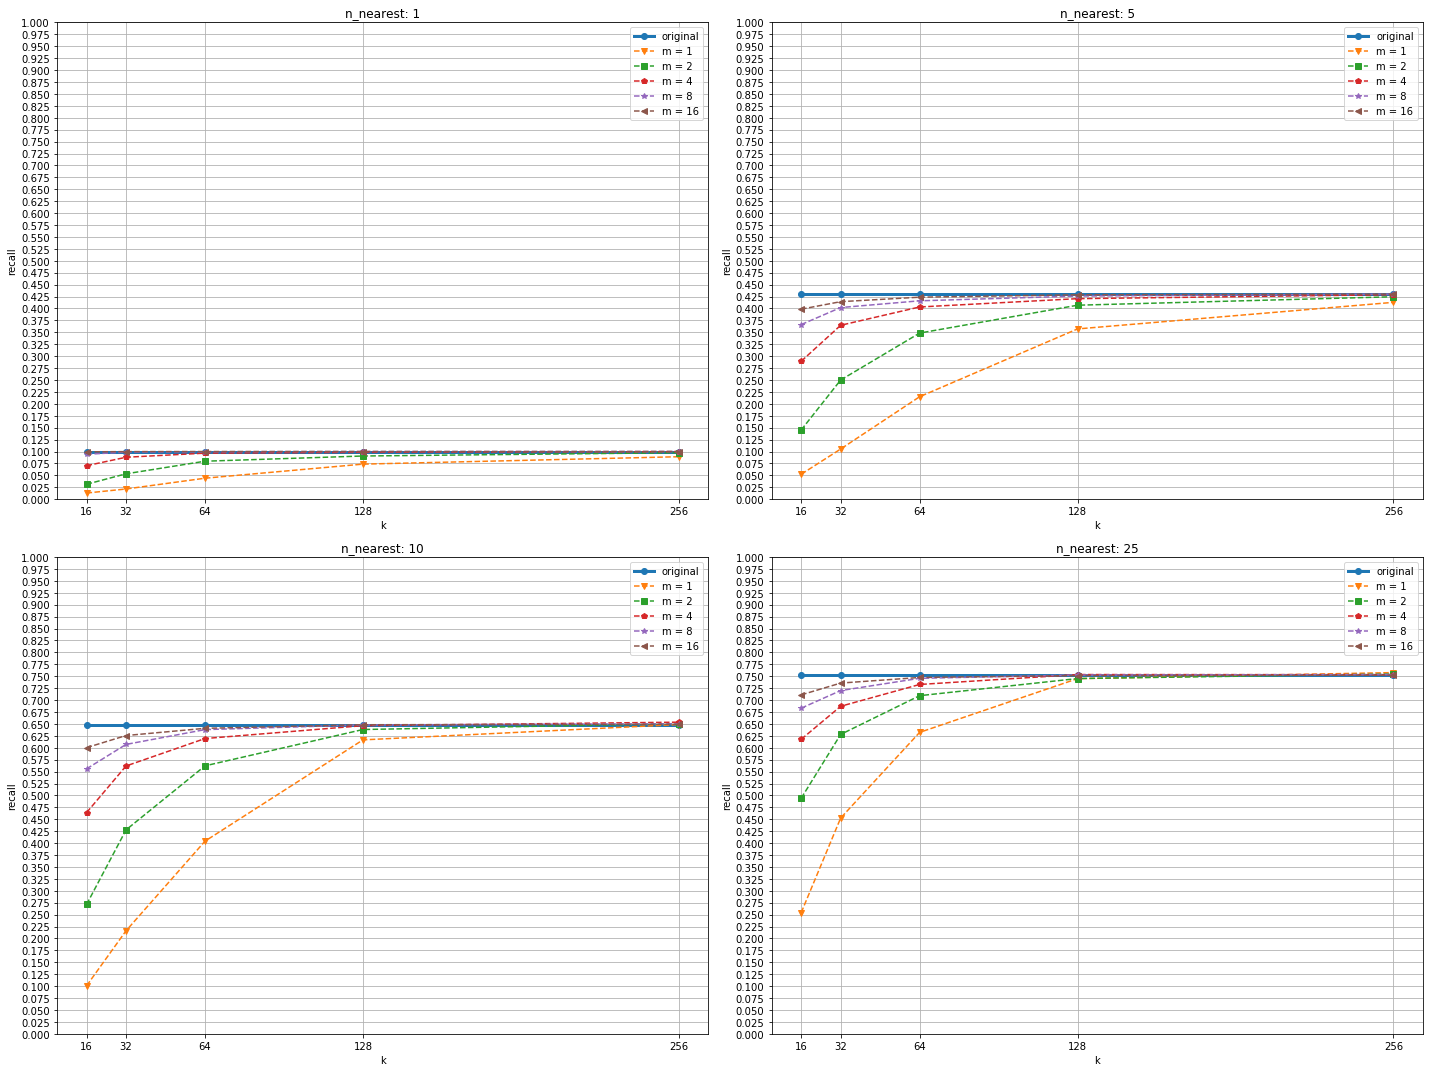

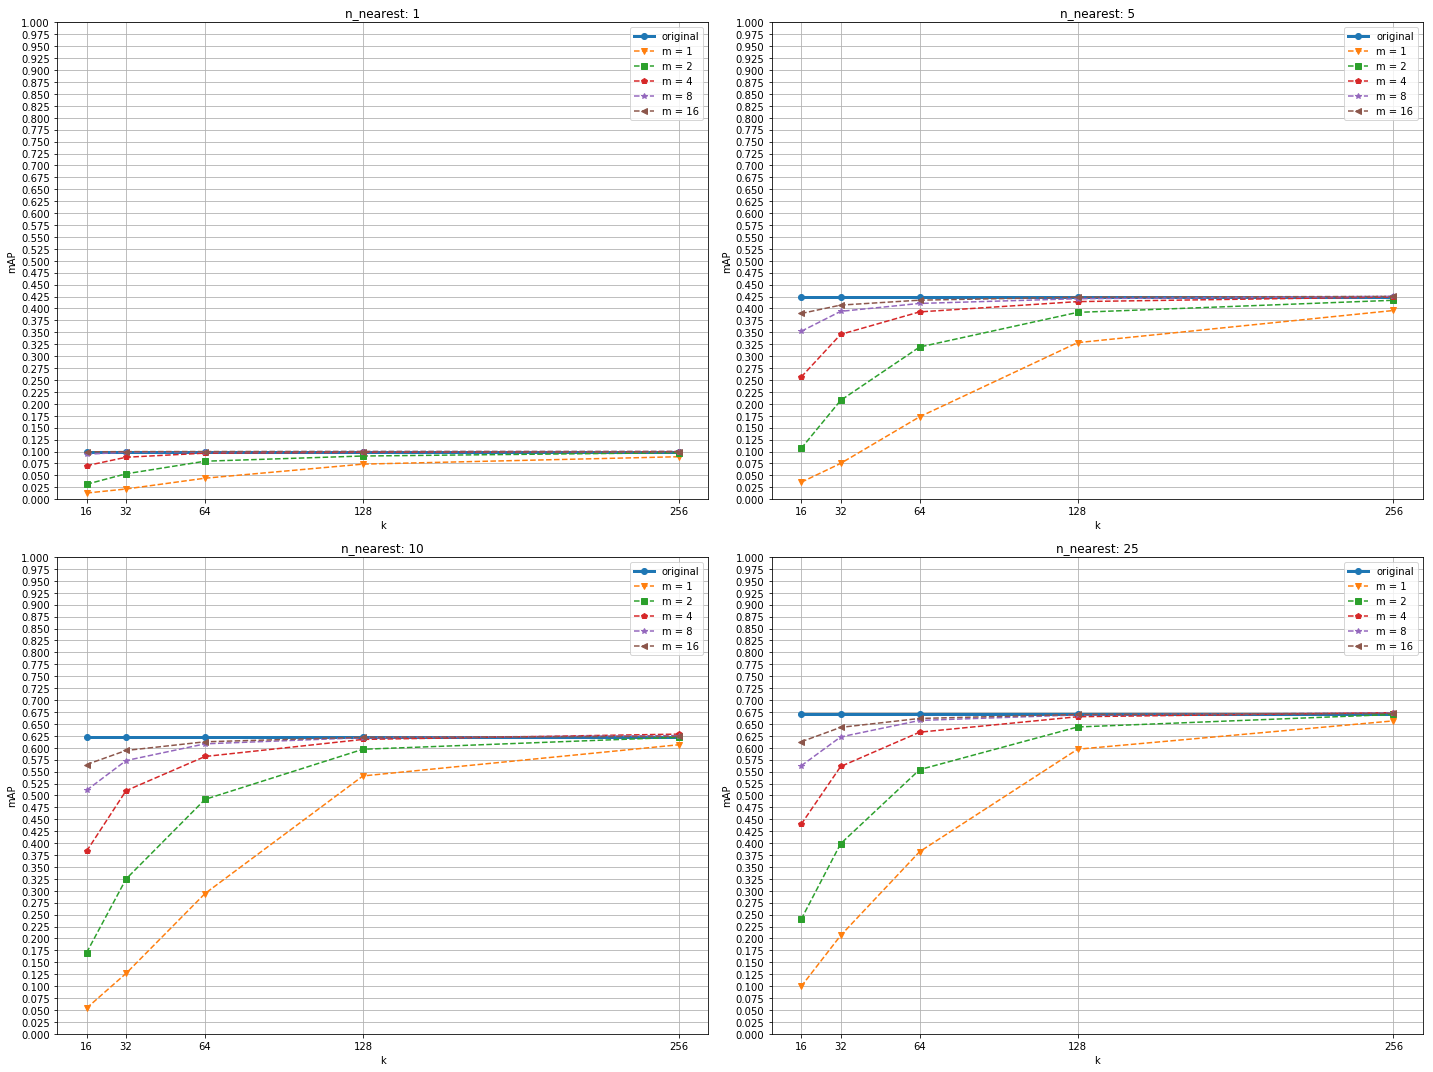

In [7]:
plot_pq_search_params_perfomance('adc', 'histograms', pq_params_arr, 'precision', n_nearest_cutoffs)
plot_pq_search_params_perfomance('adc', 'histograms', pq_params_arr, 'recall', n_nearest_cutoffs)
plot_pq_search_params_perfomance('adc', 'histograms', pq_params_arr, 'mAP', n_nearest_cutoffs)

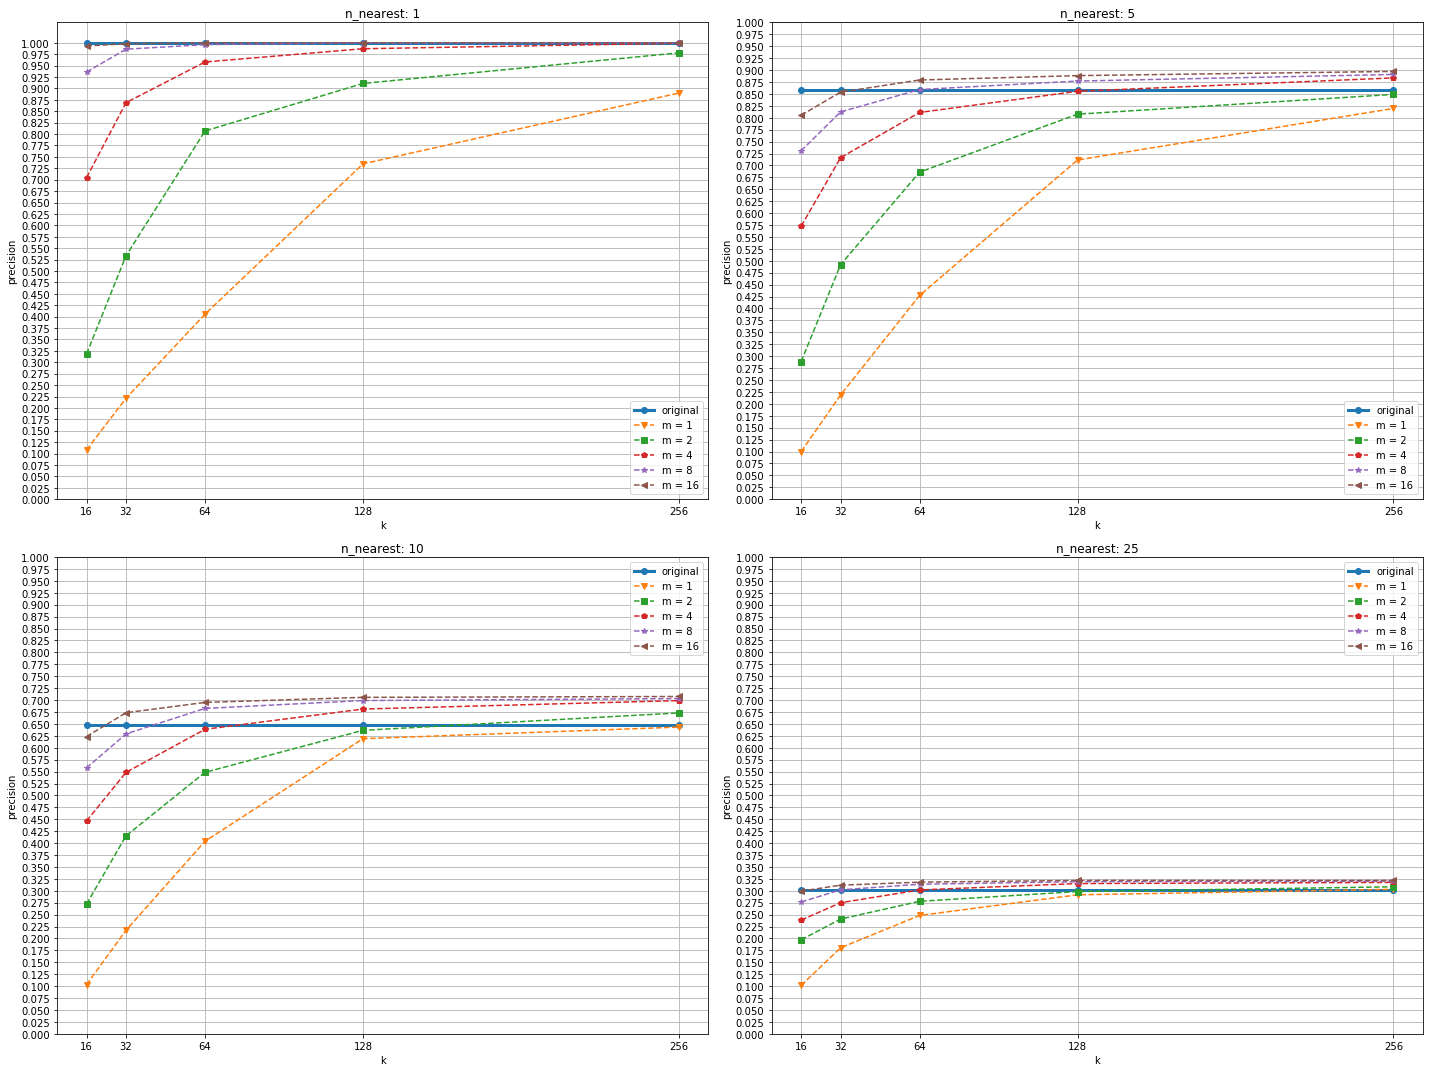

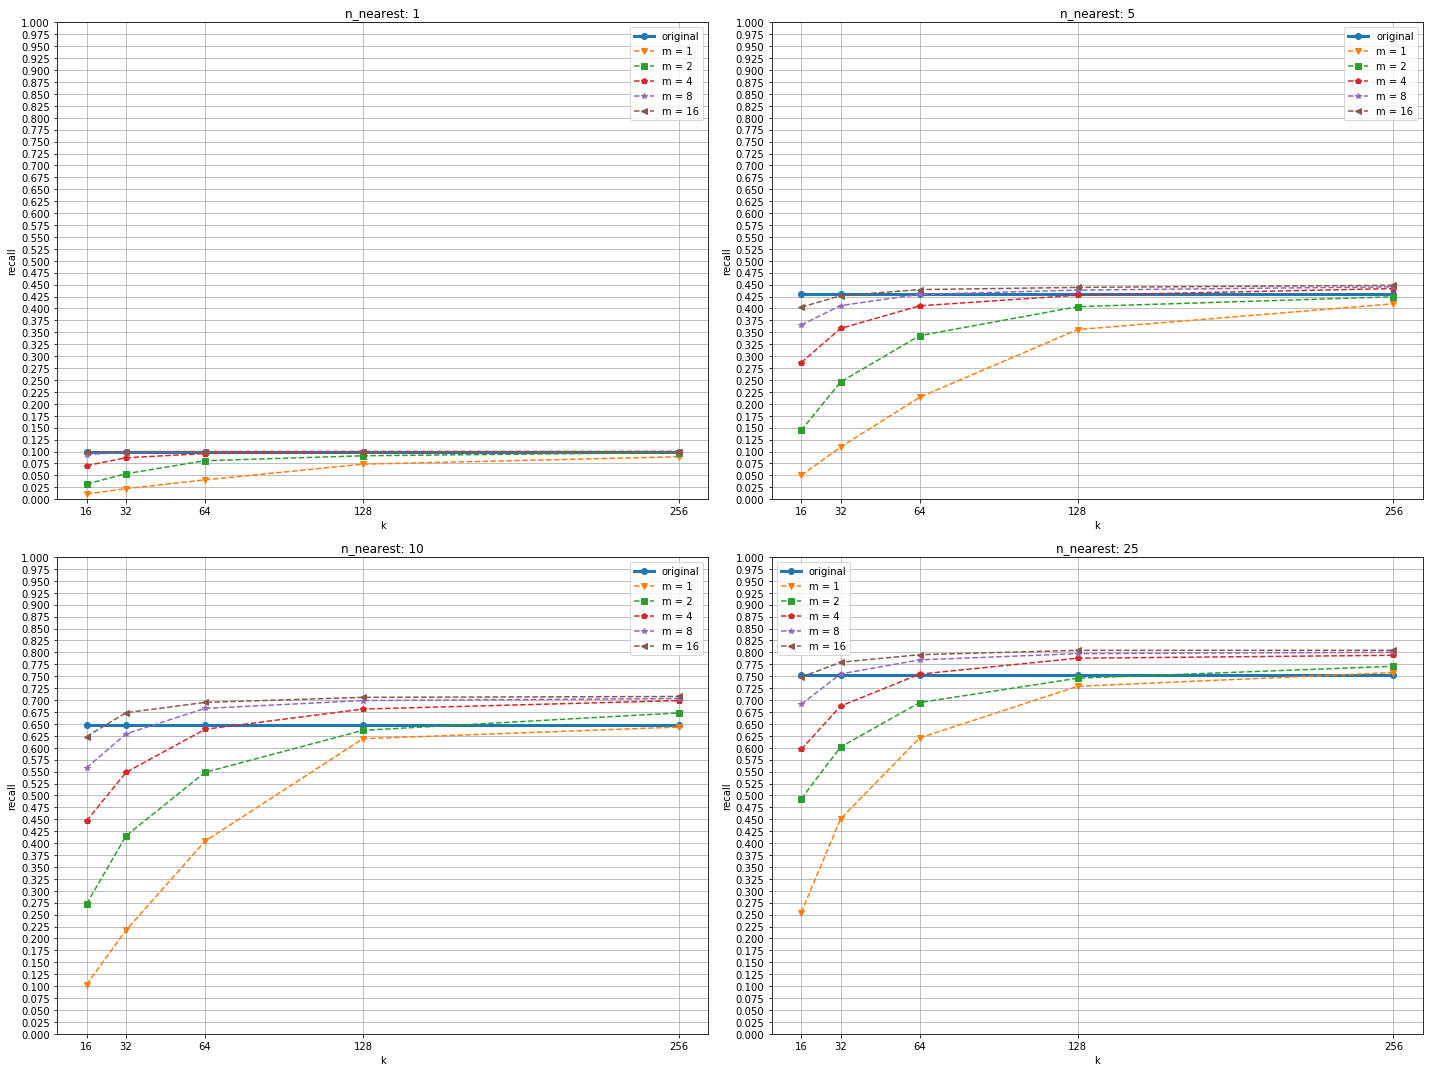

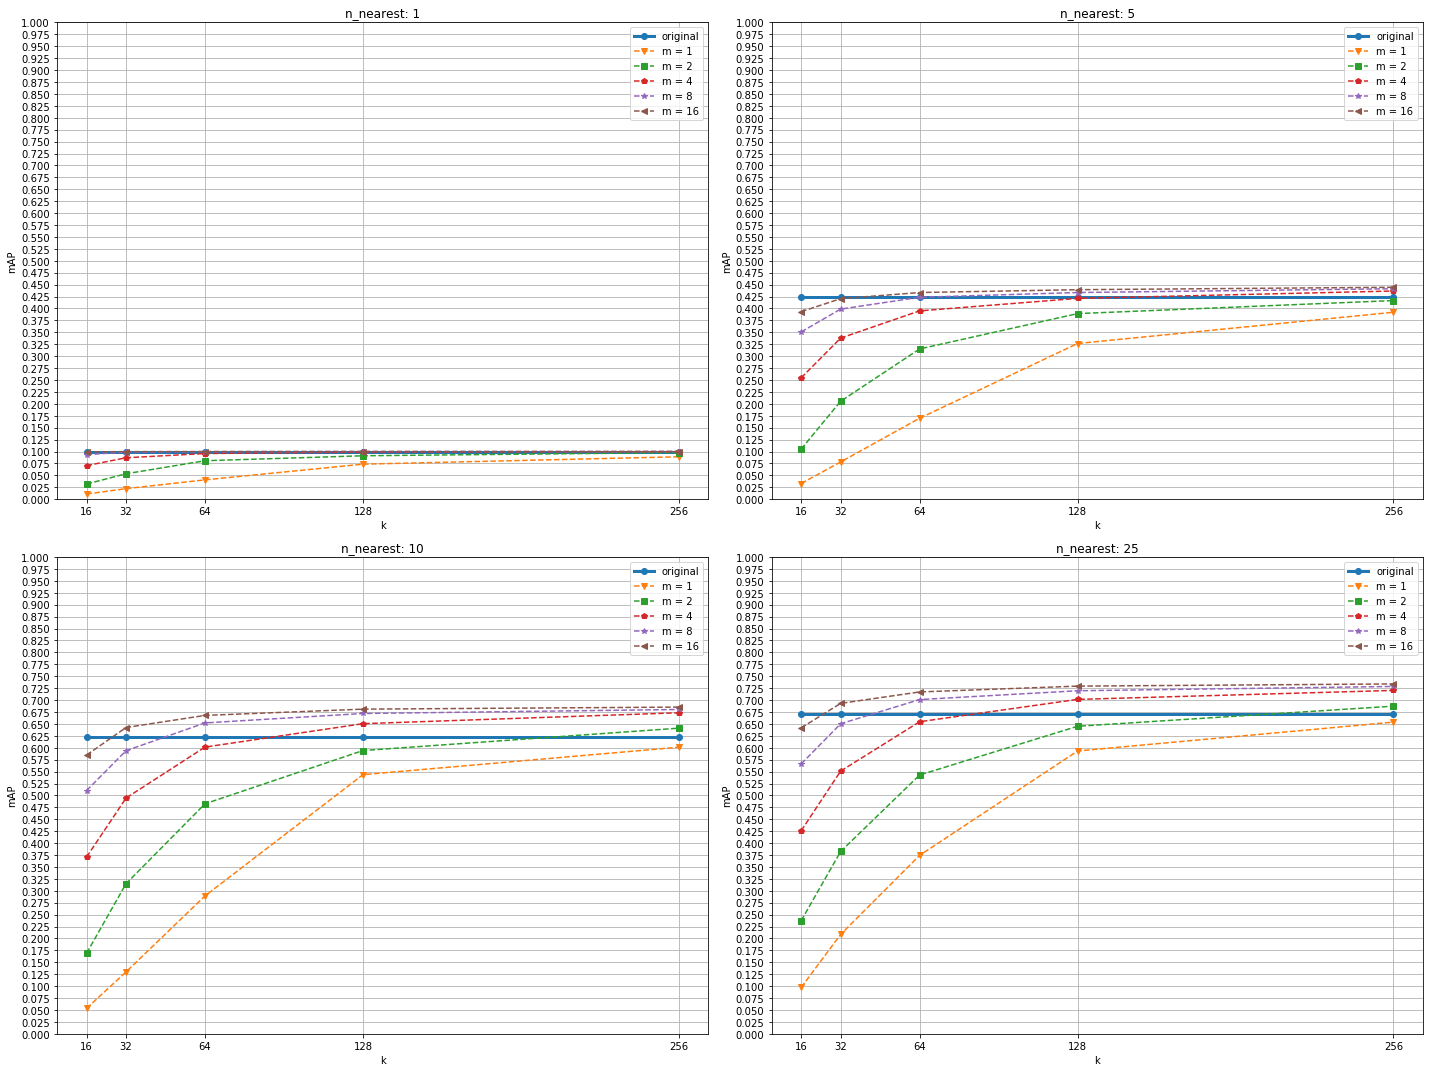

In [6]:
plot_pq_search_params_perfomance('sdc', 'histograms', pq_params_arr, 'precision', n_nearest_cutoffs)
plot_pq_search_params_perfomance('sdc', 'histograms', pq_params_arr, 'recall', n_nearest_cutoffs)
plot_pq_search_params_perfomance('sdc', 'histograms', pq_params_arr, 'mAP', n_nearest_cutoffs)

In [ ]:
plot_pq_search_params_perfomance('sdc', 'glcms', pq_params_arr, 'precision', n_nearest_cutoffs)
plot_pq_search_params_perfomance('sdc', 'lbphistograms', pq_params_arr, 'precision', n_nearest_cutoffs)

In [ ]:
plot_pq_search_params_perfomance('adc', 'glcms', pq_params_arr, 'precision', n_nearest_cutoffs)
plot_pq_search_params_perfomance('adc', 'glcms', pq_params_arr, 'recall', n_nearest_cutoffs)

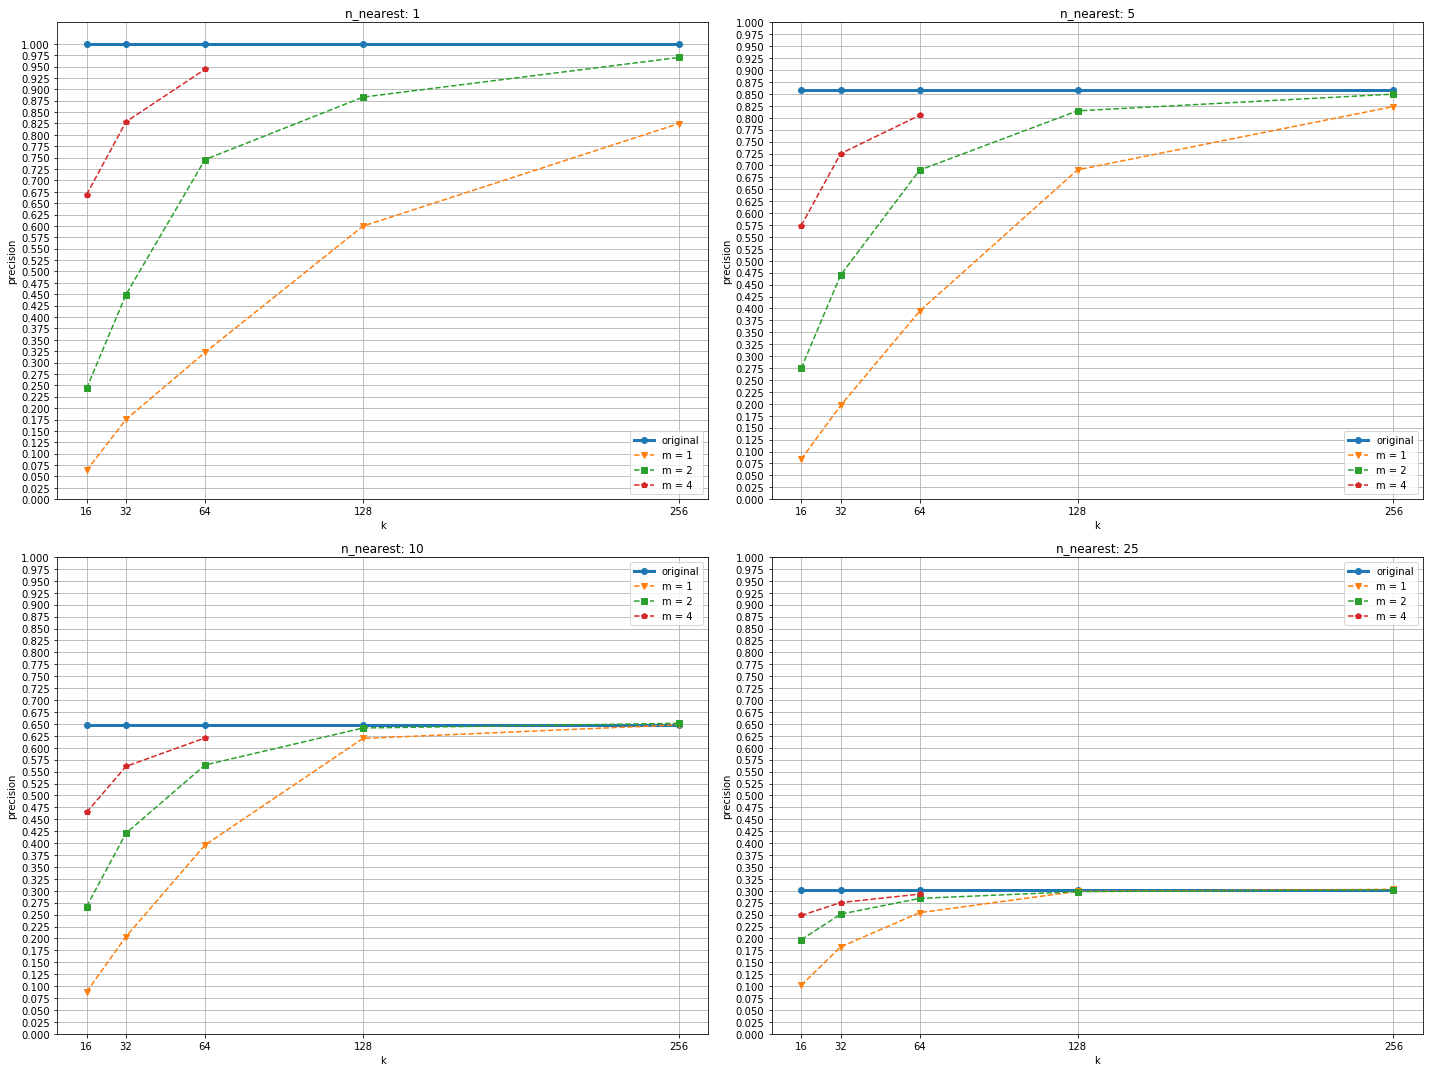

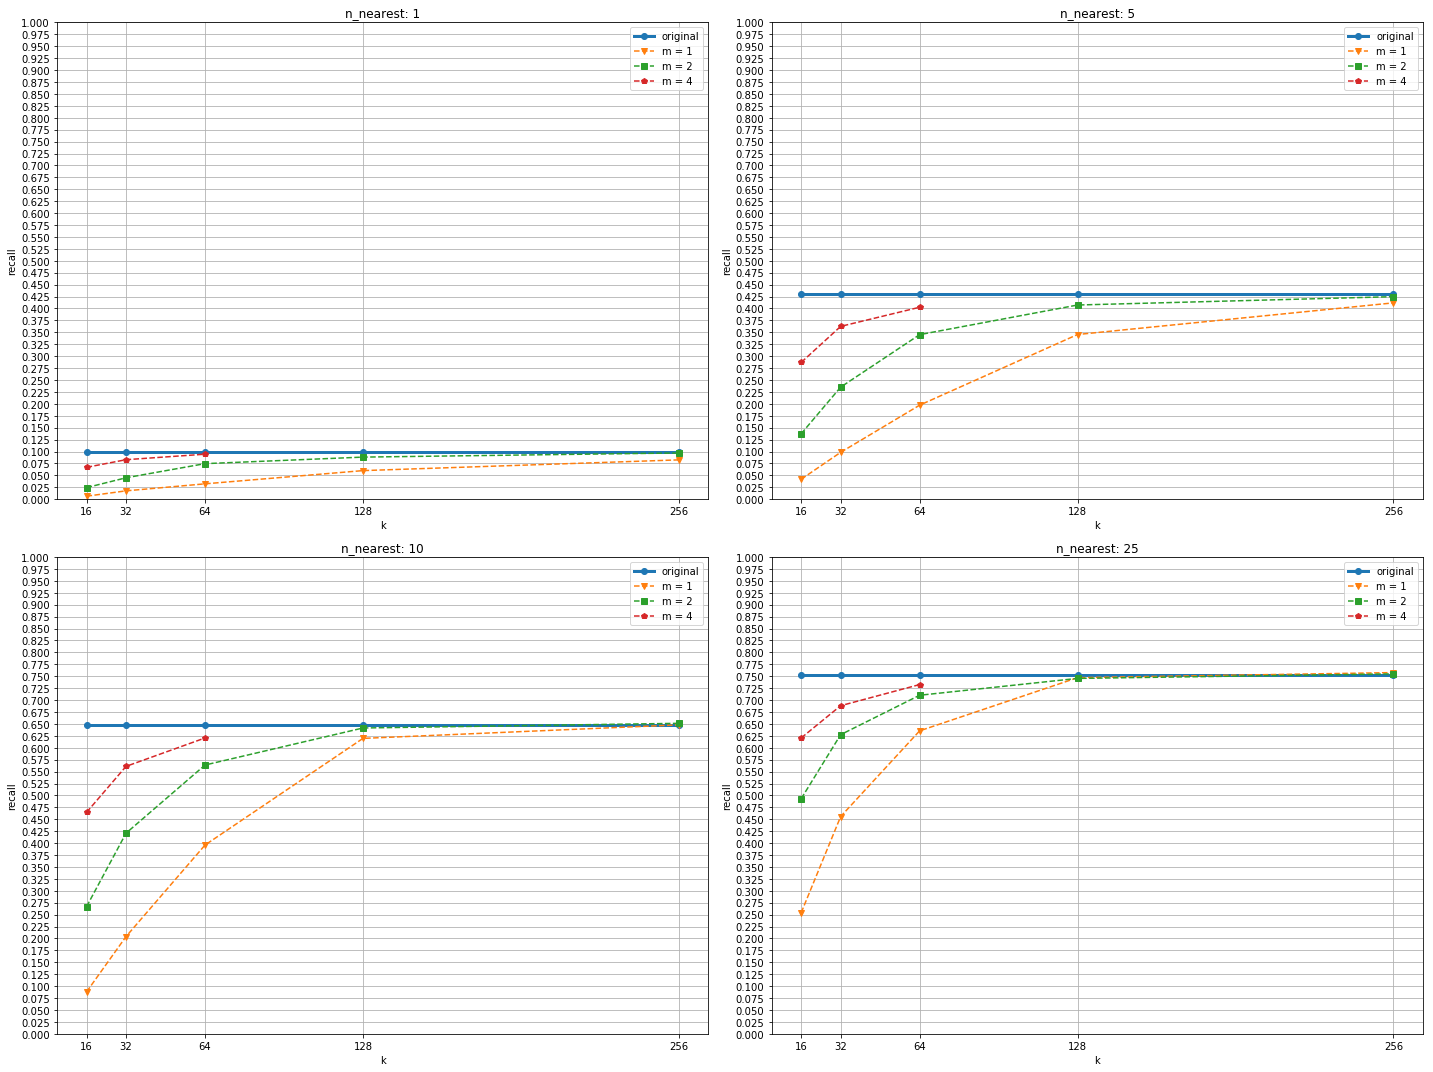

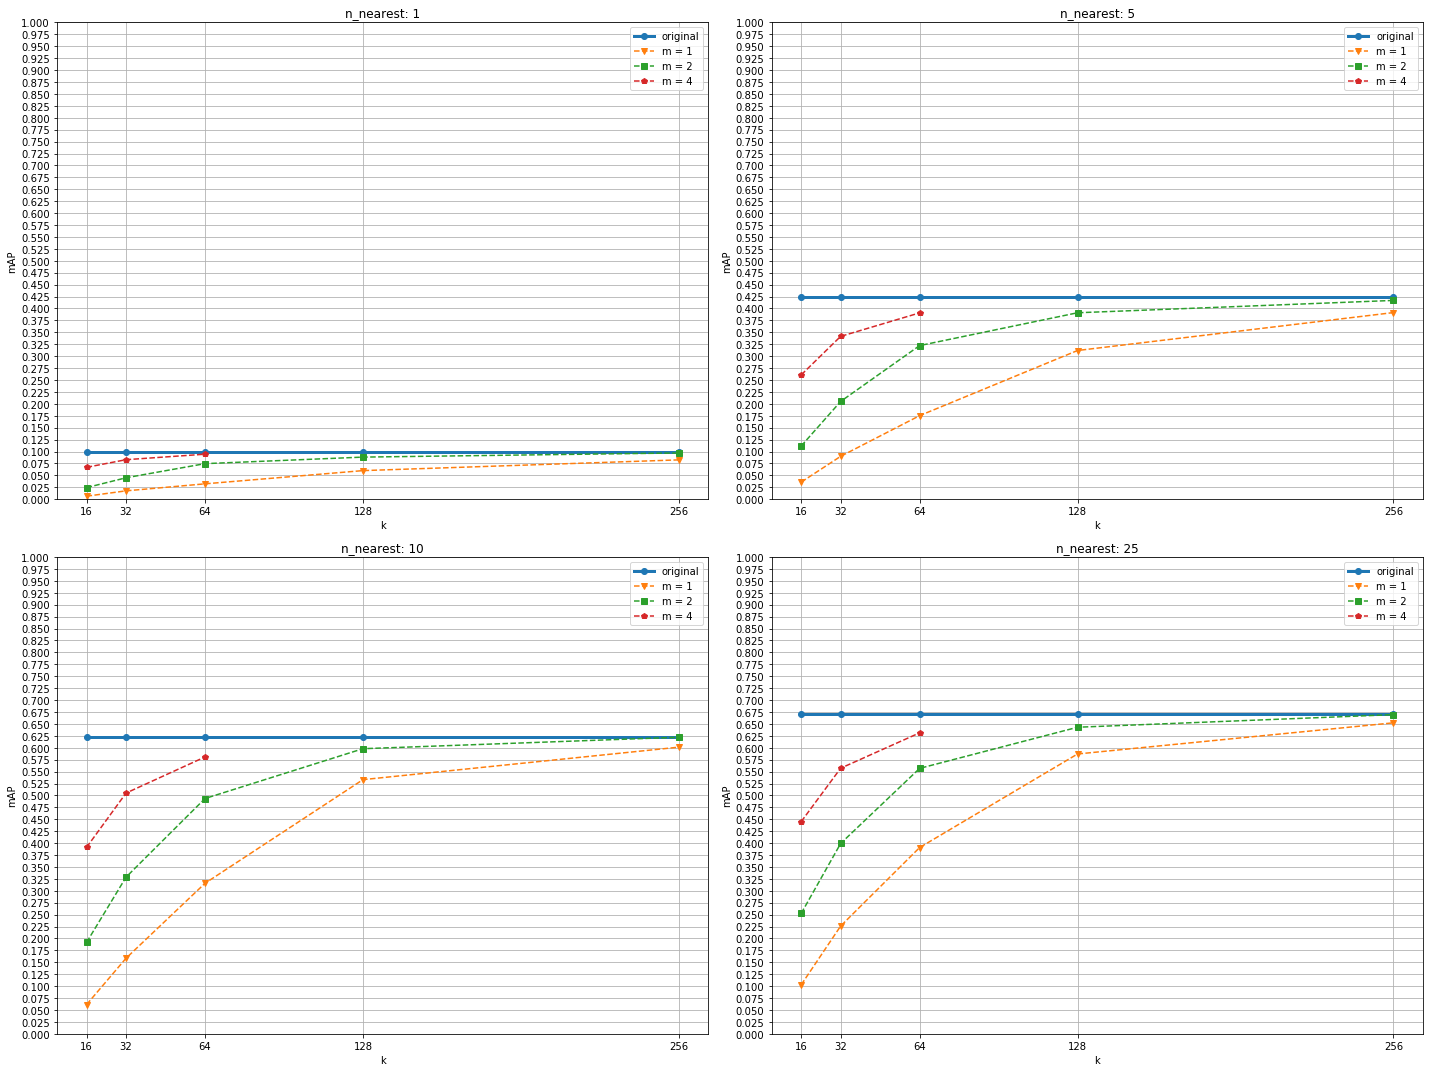

In [8]:
plot_pq_search_params_perfomance('imi', 'histograms', imi_pq_params_arr, 'precision', n_nearest_cutoffs)
plot_pq_search_params_perfomance('imi', 'histograms', imi_pq_params_arr, 'recall', n_nearest_cutoffs)
plot_pq_search_params_perfomance('imi', 'histograms', imi_pq_params_arr, 'mAP', n_nearest_cutoffs)

In [18]:
descriptor_names=['histograms', 'lbphistograms', 'glcms']
choosen_bovwproductbincounts_pq_params= [{'n_clusters': K, 'n_quantizers': m} for K,m in [(64,4),(128,1),(16,1)]]
descriptor_names+=ds_helper.bovw_descriptors_names('bovwproductbincounts',choosen_bovwproductbincounts_pq_params)

In [19]:
perfomance_names=['precision', 'recall', 'mAP']

In [20]:
for descriptor_name in descriptor_names:
    for perfomance_name in perfomance_names:
        plot_pq_search_params_perfomance('adc', descriptor_name, pq_params_arr, perfomance_name, n_nearest_cutoffs, save_to_file=True)
        plot_pq_search_params_perfomance('sdc', descriptor_name, pq_params_arr, perfomance_name, n_nearest_cutoffs, save_to_file=True)
        plot_pq_search_params_perfomance('imi', descriptor_name, imi_pq_params_arr, perfomance_name, n_nearest_cutoffs, save_to_file=True)